In [26]:
import spgci as ci
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [2]:
mdd = ci.MarketData()

In [5]:
hh = mdd.get_symbols(q="Henry Hub", mdc='GD')
hh.head()

,symbol,description,assessment_frequency,bate_code,benchmark,holiday_schedule,commodity,contract_type,currency,decimal_places,...,derivative_position,mdc,quotation_style,delivery_region,delivery_region_basis,settlement_type,active,timestamp,uom,day_of_publication
0,IGBBL21,Henry Hub FDt Com,Daily (7 day),"[h, l, u, w]",Benchmark,CALUS00,Natural gas,Spot,USD,3.0,...,1,"[AGP, GD]",Flat,Henry Hub,Henry Hub,Physical,Active - Public,14:30 US Eastern,MMB,NaN
1,BGBBL21,Henry Hub FDt DlCt,Daily (7 day),[u],NaN,NaN,Natural gas,Spot,UNS,NaN,...,1,[GD],Flat,Henry Hub,Henry Hub,Physical,Active - Public,14:30 US Eastern,CON,NaN
2,IGBBL20,Henry Hub TDt Abs,Daily (weekday),"[h, l]",NaN,CALUS00,Natural gas,Spot,USD,3.0,...,1,[GD],Flat,Henry Hub,Henry Hub,Physical,Active - Public,14:30 US Eastern,MMB,NaN
3,BGBBL00,Henry Hub TDt DlCt,Daily (weekday),[u],NaN,CALUS00,Natural gas,Spot,UNS,NaN,...,1,"[AGP, GD]",Flat,Henry Hub,Henry Hub,Physical,Active - Public,14:30 US Eastern,CON,Daily (weekdays)
4,IGBBL00,Henry Hub TDt Com,Daily (weekday),"[h, l, u, w]",NaN,CALUS00,Natural gas,Spot,USD,3.0,...,1,"[AGP, GD]",Flat,Henry Hub,Henry Hub,Physical,Active - Public,14:30 US Eastern,MMB,Daily (weekdays)


In [39]:
df = mdd.get_assessments_by_symbol_historical(symbol=hh.iloc[2:4]['symbol'], bate=['h', 'u'], assess_date_gte=date(2018, 1, 1), paginate=True)
df.head()

,bate,value,assessDate,isCorrected,modDate,symbol
0,u,74.0,2018-01-02,N,2018-01-03 00:23:01,BGBBL00
1,u,54.0,2018-01-03,N,2018-01-03 23:54:42,BGBBL00
2,u,58.0,2018-01-04,N,2018-01-05 02:01:32,BGBBL00
3,u,40.0,2018-01-05,N,2018-01-05 23:14:43,BGBBL00
4,u,36.0,2018-01-08,N,2018-01-09 00:05:15,BGBBL00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   bate         2582 non-null   object        
 1   value        2582 non-null   float64       
 2   assessDate   2582 non-null   datetime64[ns]
 3   isCorrected  2582 non-null   object        
 4   modDate      2582 non-null   datetime64[ns]
 5   symbol       2582 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 121.2+ KB


In [41]:
pt = df.pivot_table(index='assessDate', columns='symbol', values='value')
pt.head()

symbol,BGBBL00,IGBBL20
assessDate,,
2018-01-02,74.0,7.500
2018-01-03,54.0,7.700
2018-01-04,58.0,5.000
2018-01-05,40.0,2.950
2018-01-08,36.0,2.925


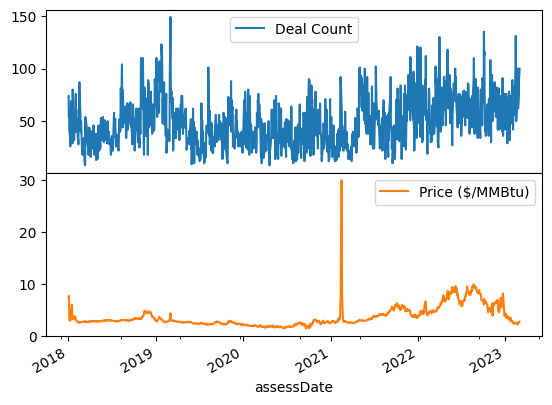

In [67]:
pt.columns = ['Deal Count', 'Price ($/MMBtu)']
pt.plot(subplots=True, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

In [43]:
mdc = mdd.get_mdcs()
mdc.head()

,mdc,description,isSubscribed
0,1A,EWindow: Physical Crudes Asia,True
1,1B,EWindow: Physical Products Asia,True
2,1C,EWindow: Financial Asia,True
3,2A,EWindow: Physical Crudes EMEA,True
4,2B,EWindow: Physical Products EMEA,True


In [47]:
filt =  mdc['description'].str.contains("gas",case=False)
mdc[filt]

,mdc,description,isSubscribed
22,AGP,MI Americas Gas & Power,True
45,AN,Natural Gas: Americas Non-Platts data,True
63,CAG,MI Canadian Gas,True
88,CU,Futures/Nearbys: NYMEX CME RBOB Gasoline,True
105,EBM,Natural Gas: European Biomethane,True
107,EDC,M2MS: 120-month Gas forward curves North East,True
114,EG,Natural Gas: European Assessments,True
115,EGI,In-house: Natural Gas Euro Assmts Inact,True
116,EGP,MI EU Gas & Power,True
118,EH,Natural Gas: European Exch/Other,True


In [53]:
egp = mdd.get_assessments_by_mdc_current(mdc="EGP", paginate=False, bate='h')
egp.head()

,bate,assessDate,value,isCorrected,modDate,symbol
0,h,2023-03-03,118.10,N,2023-03-03 17:28:23,AAAXS00
1,h,2023-02-01,132.19,N,2023-03-01 10:50:04,AAAXT00
2,h,2023-03-04,677.90,N,2023-03-03 15:03:54,AACMD00
3,h,2018-05-29,44.85,N,2018-05-25 17:23:41,AACTG21
4,h,2018-05-01,37.44,N,2018-06-01 09:50:04,AACTH00


In [112]:
egp_sym = mdd.get_symbols(mdc="EGP", assessment_frequency=[mdd.AssessmentFrequency.Daily, mdd.AssessmentFrequency.DailyWeekday], paginate=True, uom='M')
egp_sym.head()

Fetching...: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


,symbol,description,assessment_frequency,bate_code,holiday_schedule,commodity,contract_type,currency,curve_code,curve_name,...,active,timestamp,uom,day_of_publication,delivery_region,fuel_efficiency,delivery_region_port_id,commodity_grade,delivery_region_basis_port_id,shipping_terms
0,EEXIC01,EEX Italy Base Vol MWh Mo03,Daily (weekday),[u],CALLN00,Electricity,Prompt,N/A,CN2PL,EEX Italy Base Future Volume,...,Active - Public,16:30 UK,MGW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EEXIC00,EEX Italy Base Eur/MWh Mo03,Daily (weekday),[c],CALLN00,Electricity,Prompt,EUR,CN2IB,EEX Italy Base Future,...,Active - Public,16:30 UK,MGW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EEXIG01,EEX Italy Base Vol MWh Yr02,Daily (weekday),[u],CALLN00,Electricity,Prompt,N/A,CN2PL,EEX Italy Base Future Volume,...,Active - Public,16:30 UK,MGW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GPGTD00,France PEG DA Eur/Mwh,Daily (weekday),"[c, h, l]",CALLN00,Natural gas,Spot,EUR,NaN,NaN,...,Active - Public,16:30 UK,MGW,Daily (weekdays),Central Europe,NaN,NaN,NaN,NaN,NaN
4,CKFQ100,Cln UK 1 QA Spk Sprd 50%,Daily (weekday),[u],CALLN00,Spark spread,Forward,GBP,NaN,NaN,...,Active - Public,16:30 UK,MGW,Daily (weekdays),IntercontinentalExchange,50%,NaN,NaN,NaN,NaN


In [113]:
joined = egp.merge(egp_sym, on='symbol')
joined.head()

,bate,assessDate,value,isCorrected,modDate,symbol,description,assessment_frequency,bate_code,holiday_schedule,...,active,timestamp,uom,day_of_publication,delivery_region,fuel_efficiency,delivery_region_port_id,commodity_grade,delivery_region_basis_port_id,shipping_terms
0,h,2018-05-29,48.75,N,2018-05-25 17:23:41,AACTK21,Germany DA Pk FDt Euro,Daily (weekday),"[c, h, l]",#Not Applicable,...,Active - Public,12:00 UK,MGW,NaN,"Transnet, TenneT Amprion, 50Hertz Trans",NaN,NaN,NaN,NaN,NaN
1,h,2018-05-29,54.25,N,2018-05-25 17:34:33,AACXG21,France DA Peak FDt Euro,Daily (weekday),"[c, h, l]",#Not Applicable,...,Active - Public,12:00 UK,MGW,NaN,Reseau de Transport d'Electricite (RTE),NaN,NaN,NaN,NaN,NaN
2,h,2023-03-03,134.65,N,2023-03-03 10:44:45,AADET00,UK GTMA DA Base TDt,Daily (weekday),"[c, h, l]",CALLN00,...,Active - Public,16:30 UK,MGW,Daily (weekdays),National Grid PLC,NaN,NaN,NaN,NaN,NaN
3,h,2022-12-30,147.80,N,2022-12-30 12:07:32,AADET27,UK GTMA DA+1 Base TDt,Daily (weekday),"[c, h, l]",CALLN00,...,Active - Public,16:30 UK,MGW,NaN,National Grid PLC,NaN,NaN,NaN,NaN,NaN
4,h,2022-12-23,150.15,N,2022-12-23 12:02:18,AADET28,UK GTMA DA+2 Base TDt,Daily (weekday),"[c, h, l]",CALLN00,...,Active - Public,16:30 UK,MGW,NaN,National Grid PLC,NaN,NaN,NaN,NaN,NaN


In [116]:
# filt = joined['derivative_maturity_frequency'].isna()
# joined = joined[filt]
joined = joined[['symbol', 'description', 'value', 'assessDate', 'modDate', 'currency', 'uom']].sort_values("assessDate", ascending=False).reset_index()
joined


,index,symbol,description,value,assessDate,modDate,currency,uom
0,9,AADFC21,UK GTMA DA Pk FDt,142.65,2023-03-06,2023-03-03 17:34:52,GBP,MGW
1,49,AAIKB00,UK/GTMA Baseload Season 3 Euro,137.77,2023-03-03,2023-03-03 17:35:09,EUR,MGW
2,17,AADGV00,UK GTMA 1-Mo Pk,130.35,2023-03-03,2023-03-03 17:34:47,GBP,MGW
3,18,AADIJ00,UK GTMA 1-Mo Pk Euro,147.25,2023-03-03,2023-03-03 17:35:09,EUR,MGW
4,19,AADNN00,UK Base Weekend,118.90,2023-03-03,2023-03-03 17:34:47,GBP,MGW
...,...,...,...,...,...,...,...,...
114,12,AADFC29,UK GTMA DA+3 Pk TDt,71.15,2018-12-21,2018-12-21 13:24:28,GBP,MGW
115,1,AACXG21,France DA Peak FDt Euro,54.25,2018-05-29,2018-05-25 17:34:33,EUR,MGW
116,0,AACTK21,Germany DA Pk FDt Euro,48.75,2018-05-29,2018-05-25 17:23:41,EUR,MGW
117,13,AADFC30,UK GTMA DA+4 Pk TDt,28.75,2010-08-12,2010-08-12 16:13:13,GBP,MGW


In [119]:
sym_history = mdd.get_assessments_by_symbol_historical(symbol=joined.iloc[:10]['symbol'], assess_date_gte=date(2022, 1, 1), bate='h')
sym_history.head()

,bate,value,assessDate,isCorrected,modDate,symbol
0,h,155.15,2022-01-03,N,2021-12-31 13:57:32,AADFC21
1,h,190.15,2022-01-04,N,2021-12-31 13:57:32,AADFC21
2,h,198.15,2022-01-05,N,2022-01-04 18:17:39,AADFC21
3,h,212.15,2022-01-06,N,2022-01-05 17:20:04,AADFC21
4,h,215.15,2022-01-07,N,2022-01-06 17:32:21,AADFC21


In [123]:
sym_history = sym_history.merge(egp_sym, on='symbol')
sym_history.head()

,bate,value,assessDate,isCorrected,modDate,symbol,description,assessment_frequency,bate_code,holiday_schedule,...,active,timestamp,uom,day_of_publication,delivery_region,fuel_efficiency,delivery_region_port_id,commodity_grade,delivery_region_basis_port_id,shipping_terms
0,h,155.15,2022-01-03,N,2021-12-31 13:57:32,AADFC21,UK GTMA DA Pk FDt,Daily (weekday),"[c, h, l]",#Not Applicable,...,Active - Public,12:00 UK,MGW,Daily (weekdays),National Grid PLC,NaN,NaN,NaN,NaN,NaN
1,h,190.15,2022-01-04,N,2021-12-31 13:57:32,AADFC21,UK GTMA DA Pk FDt,Daily (weekday),"[c, h, l]",#Not Applicable,...,Active - Public,12:00 UK,MGW,Daily (weekdays),National Grid PLC,NaN,NaN,NaN,NaN,NaN
2,h,198.15,2022-01-05,N,2022-01-04 18:17:39,AADFC21,UK GTMA DA Pk FDt,Daily (weekday),"[c, h, l]",#Not Applicable,...,Active - Public,12:00 UK,MGW,Daily (weekdays),National Grid PLC,NaN,NaN,NaN,NaN,NaN
3,h,212.15,2022-01-06,N,2022-01-05 17:20:04,AADFC21,UK GTMA DA Pk FDt,Daily (weekday),"[c, h, l]",#Not Applicable,...,Active - Public,12:00 UK,MGW,Daily (weekdays),National Grid PLC,NaN,NaN,NaN,NaN,NaN
4,h,215.15,2022-01-07,N,2022-01-06 17:32:21,AADFC21,UK GTMA DA Pk FDt,Daily (weekday),"[c, h, l]",#Not Applicable,...,Active - Public,12:00 UK,MGW,Daily (weekdays),National Grid PLC,NaN,NaN,NaN,NaN,NaN


In [126]:
pt = sym_history.pivot_table(index='assessDate', values='value', columns=['description', 'symbol', 'currency', 'uom'])
pt.head(10)

description,UK Base Weekend,UK Base Wknd Euro,UK GTMA 1-Mo Pk,UK GTMA 1-Mo Pk Euro,UK GTMA 2-Mo Base,UK GTMA 2-Mo Base Euro,UK GTMA 2-Mo Pk,UK GTMA 2-Mo Pk Euro,UK GTMA DA Pk FDt,UK/GTMA Baseload Season 3 Euro
symbol,AADNN00,AADNP00,AADGV00,AADIJ00,AADNS00,AADNU00,AADXH00,AADXJ00,AADFC21,AAIKB00
currency,GBP,EUR,GBP,EUR,GBP,EUR,GBP,EUR,GBP,EUR
uom,MGW,MGW,MGW,MGW,MGW,MGW,MGW,MGW,MGW,MGW
assessDate,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.15,NaN
2022-01-04,112.65,135.01,427.55,512.40,202.70,242.93,227.60,272.77,190.15,115.71
2022-01-05,112.65,134.93,430.60,515.75,210.15,251.71,235.40,281.95,198.15,121.81
2022-01-06,177.40,212.35,431.25,516.22,216.20,258.80,241.20,288.72,212.15,122.16
2022-01-07,187.15,223.92,365.20,436.95,197.05,235.76,219.50,262.62,215.15,118.03
2022-01-10,187.15,224.16,351.65,421.19,192.15,230.15,214.60,257.04,240.15,118.88


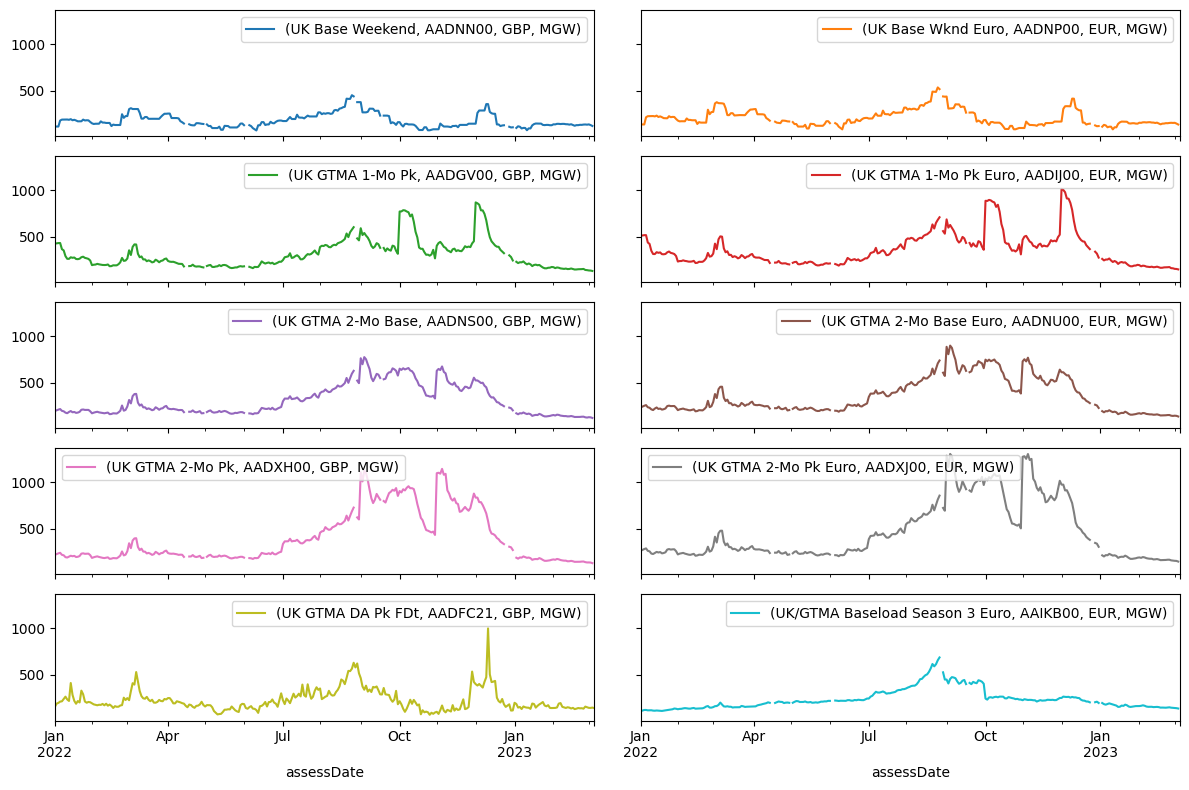

In [129]:
pt.plot(subplots=True, sharex=True, sharey=True, layout=(5,2), figsize=(12,8));
plt.tight_layout()

In [131]:
sym_history = sym_history[['description', 'symbol', 'assessDate', 'value', 'currency', 'uom']]
sym_history

,description,symbol,assessDate,value,currency,uom
0,UK GTMA DA Pk FDt,AADFC21,2022-01-03,155.15,GBP,MGW
1,UK GTMA DA Pk FDt,AADFC21,2022-01-04,190.15,GBP,MGW
2,UK GTMA DA Pk FDt,AADFC21,2022-01-05,198.15,GBP,MGW
3,UK GTMA DA Pk FDt,AADFC21,2022-01-06,212.15,GBP,MGW
4,UK GTMA DA Pk FDt,AADFC21,2022-01-07,215.15,GBP,MGW
...,...,...,...,...,...,...
2947,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-02-27,146.66,EUR,MGW
2948,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-02-28,144.95,EUR,MGW
2949,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-03-01,142.92,EUR,MGW
2950,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-03-02,141.46,EUR,MGW


In [135]:
fx_sym = mdd.get_symbols(mdc='FX', assessment_frequency=mdd.AssessmentFrequency.DailyWeekday, currency="USD")
fx_sym

,symbol,description,assessment_frequency,bate_code,holiday_schedule,commodity,contract_type,currency,decimal_places,publication_frequency_code,...,mdc,day_of_publication,quotation_style,delivery_region,delivery_region_basis,settlement_type,active,timestamp,uom,exchange
0,JPYUS00,JPY-USD Spot NY,Daily (weekday),"[h, l, u]",CALSG00,Currency,Spot,USD,4,DW,...,"[FX, MET, NFM]",Daily (weekdays),Flat,Global,Global,Financial,Active - Public,14:30 US Eastern,N/A,NaN
1,QRERA00,QAR-USD at 16:30 Singapore,Daily (weekday),[c],CALSG00,Currency,Spot,USD,4,DW,...,[FX],NaN,Flat,Global,Global,Financial,Active - Public,16:30 Singapore,N/A,NaN
2,AAFCW00,Euro/US$ forex rate 4:30 London,Daily (weekday),[u],CALLN00,Currency,NaN,USD,4,DW,...,"[AGS, FX, RIC]",Daily (weekdays),NaN,Global,Global,NaN,Active - Public,16:30 UK,UNS,NaN
3,GBPUS00,GBP-USD Spot NY,Daily (weekday),[u],CALLN00,Currency,Spot,USD,4,DW,...,"[FX, MET, NFM]",Daily (weekdays),Flat,Global,Global,Financial,Active - Public,14:30 US Eastern,N/A,NaN
4,AUU1200,AUD-USD at 12:00 GMT,Daily (weekday),[c],CALLN00,Currency,Spot,USD,4,DW,...,[FX],NaN,Flat,Global,Global,Financial,Active - Public,12:00 GMT,N/A,NaN
5,CADUS00,CAD/USD Spot Forex US Close,Daily (weekday),[u],CALUS00,Currency,Spot,USD,4,DW,...,[FX],Daily (weekdays),Flat,Global,Global,Financial,Active - Public,14:30 US Eastern,N/A,NaN
6,ORERA00,OMR-USD at 16:30 Singapore,Daily (weekday),[c],CALSG00,Currency,Spot,USD,4,DW,...,[FX],NaN,Flat,Global,Global,Financial,Active - Public,16:30 Singapore,N/A,NaN
7,EUU1200,EUR-USD at 12:00 GMT,Daily (weekday),[c],CALLN00,Currency,Spot,USD,4,DW,...,[FX],NaN,Flat,Global,Global,Financial,Active - Public,12:00 GMT,N/A,NaN
8,AAWFT00,AUD-US Dollar,Daily (weekday),"[h, l, u]",CALSG00,Currency,NaN,USD,4,DW,...,"[FX, RPR]",Daily (weekdays),NaN,Global,Global,NaN,Active - Public,16:30 Singapore,UNS,NaN
9,AUDUS00,AUD-USD Spot NY,Daily (weekday),"[h, l, u]",CALSG00,Currency,Spot,USD,4,DW,...,"[FX, MET, NFM]",Daily (weekdays),Flat,Global,Global,Financial,Active - Public,14:30 US Eastern,N/A,NaN


In [140]:
symbols = ["GBPUS00", "EURUS00"]
fx_assessments = mdd.get_assessments_by_symbol_historical(symbol=symbols, assess_date_gte=date(2022, 1, 1))
fx_assessments

,bate,value,assessDate,isCorrected,modDate,symbol
0,u,1.1293,2022-01-04,N,2022-01-04 16:51:05,EURUS00
1,u,1.1327,2022-01-05,N,2022-01-05 16:53:05,EURUS00
2,u,1.1307,2022-01-06,N,2022-01-06 16:53:15,EURUS00
3,u,1.1343,2022-01-07,N,2022-01-07 16:50:06,EURUS00
4,u,1.1325,2022-01-10,N,2022-01-10 16:46:15,EURUS00
...,...,...,...,...,...,...
583,u,1.2025,2023-02-27,N,2023-02-27 16:53:17,GBPUS00
584,u,1.2116,2023-02-28,N,2023-02-28 16:49:25,GBPUS00
585,u,1.2020,2023-03-01,N,2023-03-01 16:58:16,GBPUS00
586,u,1.1944,2023-03-02,N,2023-03-02 16:50:00,GBPUS00


In [141]:
fx_assessments['currency'] = fx_assessments['symbol'].apply(lambda x: "EUR" if x == "EURUS00" else "GBP")
fx_assessments

,bate,value,assessDate,isCorrected,modDate,symbol,currency
0,u,1.1293,2022-01-04,N,2022-01-04 16:51:05,EURUS00,EUR
1,u,1.1327,2022-01-05,N,2022-01-05 16:53:05,EURUS00,EUR
2,u,1.1307,2022-01-06,N,2022-01-06 16:53:15,EURUS00,EUR
3,u,1.1343,2022-01-07,N,2022-01-07 16:50:06,EURUS00,EUR
4,u,1.1325,2022-01-10,N,2022-01-10 16:46:15,EURUS00,EUR
...,...,...,...,...,...,...,...
583,u,1.2025,2023-02-27,N,2023-02-27 16:53:17,GBPUS00,GBP
584,u,1.2116,2023-02-28,N,2023-02-28 16:49:25,GBPUS00,GBP
585,u,1.2020,2023-03-01,N,2023-03-01 16:58:16,GBPUS00,GBP
586,u,1.1944,2023-03-02,N,2023-03-02 16:50:00,GBPUS00,GBP


In [144]:
joined = sym_history.merge(fx_assessments, on=['assessDate', 'currency'], how='left', suffixes=('', '_fx'))
joined

,description,symbol,assessDate,value,currency,uom,bate,value_fx,isCorrected,modDate,symbol_fx
0,UK GTMA DA Pk FDt,AADFC21,2022-01-03,155.15,GBP,MGW,NaN,NaN,NaN,NaT,NaN
1,UK GTMA DA Pk FDt,AADFC21,2022-01-04,190.15,GBP,MGW,u,1.3537,N,2022-01-04 16:51:05,GBPUS00
2,UK GTMA DA Pk FDt,AADFC21,2022-01-05,198.15,GBP,MGW,u,1.3567,N,2022-01-05 16:53:05,GBPUS00
3,UK GTMA DA Pk FDt,AADFC21,2022-01-06,212.15,GBP,MGW,u,1.3537,N,2022-01-06 16:53:15,GBPUS00
4,UK GTMA DA Pk FDt,AADFC21,2022-01-07,215.15,GBP,MGW,u,1.3571,N,2022-01-07 16:50:06,GBPUS00
...,...,...,...,...,...,...,...,...,...,...,...
2947,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-02-27,146.66,EUR,MGW,u,1.0589,N,2023-02-27 16:53:17,EURUS00
2948,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-02-28,144.95,EUR,MGW,u,1.0610,N,2023-02-28 16:49:25,EURUS00
2949,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-03-01,142.92,EUR,MGW,u,1.0673,N,2023-03-01 16:58:16,EURUS00
2950,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-03-02,141.46,EUR,MGW,u,1.0597,N,2023-03-02 16:50:00,EURUS00


In [145]:
joined['value_usd'] = joined['value'] * joined['value_fx']
joined

,description,symbol,assessDate,value,currency,uom,bate,value_fx,isCorrected,modDate,symbol_fx,value_usd
0,UK GTMA DA Pk FDt,AADFC21,2022-01-03,155.15,GBP,MGW,NaN,NaN,NaN,NaT,NaN,NaN
1,UK GTMA DA Pk FDt,AADFC21,2022-01-04,190.15,GBP,MGW,u,1.3537,N,2022-01-04 16:51:05,GBPUS00,257.406055
2,UK GTMA DA Pk FDt,AADFC21,2022-01-05,198.15,GBP,MGW,u,1.3567,N,2022-01-05 16:53:05,GBPUS00,268.830105
3,UK GTMA DA Pk FDt,AADFC21,2022-01-06,212.15,GBP,MGW,u,1.3537,N,2022-01-06 16:53:15,GBPUS00,287.187455
4,UK GTMA DA Pk FDt,AADFC21,2022-01-07,215.15,GBP,MGW,u,1.3571,N,2022-01-07 16:50:06,GBPUS00,291.980065
...,...,...,...,...,...,...,...,...,...,...,...,...
2947,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-02-27,146.66,EUR,MGW,u,1.0589,N,2023-02-27 16:53:17,EURUS00,155.298274
2948,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-02-28,144.95,EUR,MGW,u,1.0610,N,2023-02-28 16:49:25,EURUS00,153.791950
2949,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-03-01,142.92,EUR,MGW,u,1.0673,N,2023-03-01 16:58:16,EURUS00,152.538516
2950,UK/GTMA Baseload Season 3 Euro,AAIKB00,2023-03-02,141.46,EUR,MGW,u,1.0597,N,2023-03-02 16:50:00,EURUS00,149.905162


In [147]:
pt = joined.pivot_table(index='assessDate', values='value_usd', columns=['description', 'symbol'])
pt.head()

description,UK Base Weekend,UK Base Wknd Euro,UK GTMA 1-Mo Pk,UK GTMA 1-Mo Pk Euro,UK GTMA 2-Mo Base,UK GTMA 2-Mo Base Euro,UK GTMA 2-Mo Pk,UK GTMA 2-Mo Pk Euro,UK GTMA DA Pk FDt,UK/GTMA Baseload Season 3 Euro
symbol,AADNN00,AADNP00,AADGV00,AADIJ00,AADNS00,AADNU00,AADXH00,AADXJ00,AADFC21,AAIKB00
assessDate,,,,,,,,,,
2022-01-04,152.494305,152.466793,578.774435,578.653320,274.394990,274.340849,308.10212,308.039161,257.406055,130.671303
2022-01-05,152.832255,152.835211,584.195020,584.190025,285.110505,285.111917,319.36718,319.364765,268.830105,137.974187
2022-01-06,240.146380,240.104145,583.783125,583.689954,292.669940,292.625160,326.51244,326.455704,287.187455,138.126312
2022-01-07,253.981265,253.992456,495.612920,495.632385,267.416555,267.422568,297.88345,297.889866,291.980065,133.881429
2022-01-10,253.906405,253.861200,477.083555,476.997675,260.689905,260.644875,291.14782,291.097800,325.811505,134.631600


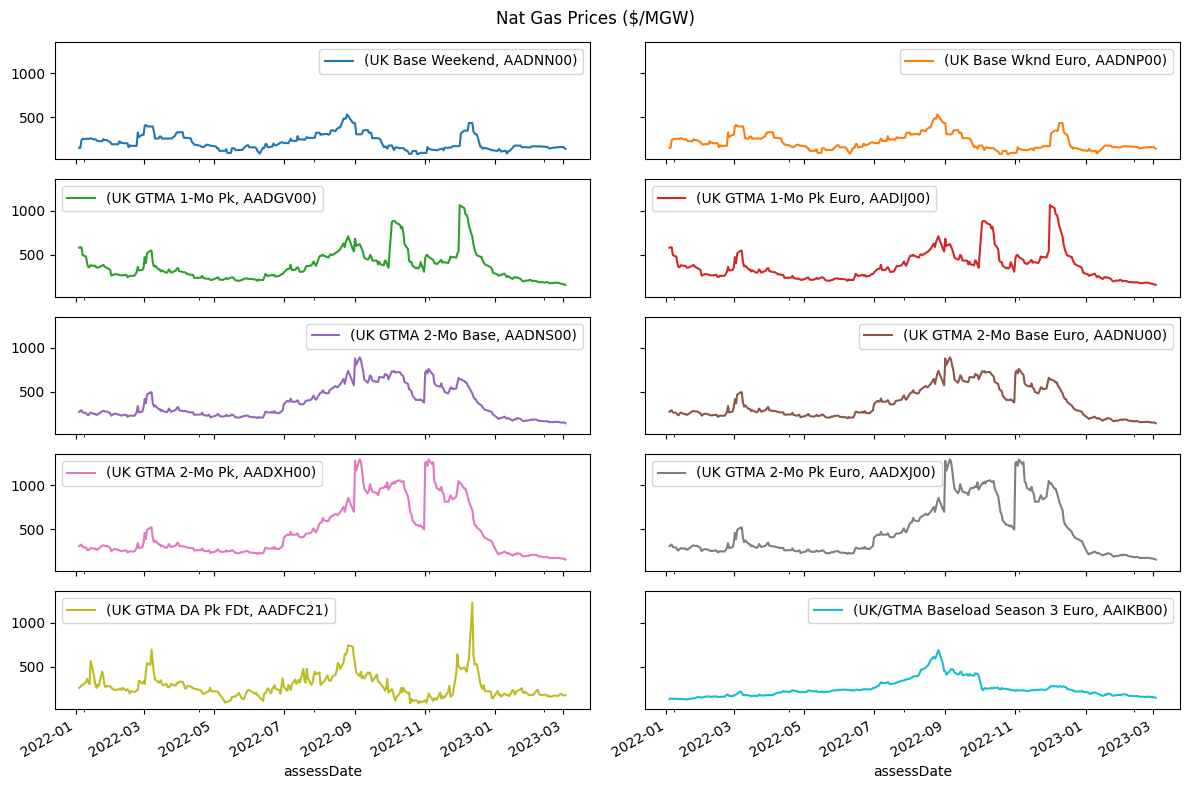

In [149]:
pt.plot(subplots=True, sharex=True, sharey=True, layout=(5,2), figsize=(12,8), title="Nat Gas Prices ($/MGW)");
plt.tight_layout()